# Export as extrapolated .tsv from Track Attack with all columns

In [1]:
import pandas as pd
from pathlib import Path
from os.path import abspath, dirname, split, splitext
data_path = abspath("data")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import os
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

from mpl_toolkits.basemap import Basemap

In [2]:
column_names = ['start_date', 'start_time', 'lap_number', 'session_time', 'lap_time',
       'long_acceleration', 'lattitude', 'gps_lat_acceleration',
       'heading', 'rpm', 'gps_distance', 'gps_long_acceleration',
       'lat_acceleration', 'longitude', 'gps_speed',
       'num_satellites', 'throttle_position','file']

In [31]:
track_configs = {'umc-east':
                 [{'corner_num':'1','corner_name':'turn_1','coord':[40.58313387564972, -112.377462146332],'heading':'w'},
                  {'corner_num':'2','corner_name':'fast','coord':[40.582147300913256, -112.37800820636099],'heading':'e'},
                  {'corner_num':'3','corner_name':'faster','coord':[40.58179961496041, -112.37656498144997],'heading':'e'},
                  {'corner_num':'4','corner_name':'gotcha','coord':[40.580491356707405, -112.3748967376012],'heading':'e'},
                  {'corner_num':'5','corner_name':'maybe_yll_makit','coord':[40.57961917032409, -112.37351558687992],'heading':'e'},
                  {'corner_num':'6','corner_name':'satisfaction','coord':[40.578511241494205, -112.37304227118328],'heading':'s'},
                  {'corner_num':'7','corner_name':'agony_ecstacy','coord':[40.5792478983455, -112.37545540530871],'heading':'n'},
                  {'corner_num':'8','corner_name':'first_attitude','coord':[40.578941450080734, -112.37732539027405],'heading':'s'},
                  {'corner_num':'9','corner_name':'second_attitude','coord':[40.57733846705052, -112.37613046212194],'heading':'w'},
                  {'corner_num':'10','corner_name':'bad_attitude','coord':[40.57694360871717, -112.37537781257156],'heading':'s'},
                  {'corner_num':'11','corner_name':'tooele_turn','coord':[40.5766960843945, -112.37294915989871],'heading':'e'},
                  {'corner_num':'12','corner_name':'kink','coord':[40.57793369685003, -112.37137402733451],'heading':'n'},
                  {'corner_num':'13','corner_name':'club_house_corner','coord':[40.579784179430945, -112.37164560191455],'heading':'n'},
                  {'corner_num':'14','corner_name':'wind_up','coord':[40.58097459021327, -112.3728482893404],'heading':'w'},
                  {'corner_num':'15','corner_name':'release','coord':[40.5821119431023, -112.37338367922673],'heading':'e'},
                  {'corner_num':'0','corner_name':'main_straight','coord':[40.58319624080327, -112.37422168078798],'heading':'w'}
                 ],
                'umc-west':[],
                'umc-outer':[],
                'umc-full':[]}

In [83]:
def corner_assign(lat_column,lon_column,track_config_list, gate=.00025):
    lat_list = lat_column.to_list()
    lon_list = lon_column.to_list()
    corner_dict = {}
    corner_name = []
    corner_num = []
    corner = -1
    for i, lon in enumerate(lon_list):
        corner_details = {}
        lat = lat_list[i]
        heading = track_config_list[corner]['heading']
        if corner >= len(track_config_list) -1:
            corner = -1
        c_lon = track_config_list[corner+1]['coord'][1]
        c_lat = track_config_list[corner+1]['coord'][0]
        if track_config_list[corner]['heading'] == "n":
            if lat > c_lat and lon > c_lon - gate and lon < c_lon + gate:
                corner += 1
        elif track_config_list[corner]['heading'] == "s":
            if lat < c_lat and lon > c_lon - gate and lon < c_lon + gate:
                corner += 1
        elif track_config_list[corner]['heading'] == "e":
             if lon  > c_lon and lat > c_lat - gate and lat < c_lat + gate:
                corner += 1
        elif track_config_list[corner]['heading'] == "w":
            if lon  < c_lon and lat > c_lat - gate and lat < c_lat + gate:
                corner += 1
        #print(corner, track_config_list[corner])
        corner_name.append(track_config_list[corner]['corner_name'])
        corner_num.append(track_config_list[corner]['corner_num'])
    corner_dict['corner_name'] = corner_name
    corner_dict['corner_num'] = corner_num
    
    return corner_dict

In [90]:
def mph_convert(speed_column, units = 'kph'):
    if units == 'kph':
        speed = speed_column * 0.62137
    else:
        speed = speed_column
    return speed

In [105]:
speed_units = 'kph' #'kph' or 'mph'

In [95]:
df_dict = {}
meta_dict = {}
p = Path(data_path)
for item in p.iterdir():
    if item.is_dir():
        dir_name = split(item)[1]
        first = True
        meta = {}
        for file in item.iterdir():
            file_name = split(file)[1]
            if splitext(file)[1] == '.tsv':
                if first:
                    df_final = pd.read_csv(file, delimiter = "\t")
                    df_final['file'] = file_name.split('.')[0]
                    first = False
                else:
                    df = pd.read_csv(file, delimiter = "\t")
                    df['file'] = file_name.split('.')[0]
                    df_final = df_final.append(df)
        df_final = df_final.reset_index(drop=True)
        df_final.columns = column_names
        df_final['mph'] = mph_convert(df_final['gps_speed'],speed_units)
        df_dict[dir_name] = df_final
        meta['track'] = dir_name.split("_")[0]
        meta['track_config'] = dir_name.split("_")[1]
        meta['driver'] = dir_name.split("_")[2]
        meta['date'] = dir_name.split("_")[3]
        meta['track_and_config'] = dir_name.split("_")[0] + '-' + dir_name.split("_")[1]
        meta_dict[dir_name] = meta


In [4]:
df_dict.keys()

dict_keys(['umc_east_br_4_23_21'])

In [100]:
key = 'umc_east_br_4_23_21'
race_data = df_dict[key]
race_data

,start_date,start_time,lap_number,session_time,lap_time,long_acceleration,lattitude,gps_lat_acceleration,heading,rpm,gps_distance,gps_long_acceleration,lat_acceleration,longitude,gps_speed,num_satellites,throttle_position,file,mph
0,2021-04-23,21:49:33,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,session_4,NaN
1,2021-04-23,21:49:33,0,100000000,100000000,0.11,40.583207,0.000000,269.9,0.0,3.850000,0.000000,0.00,-112.375962,138.6,15.0,0.0,session_4,86.121882
2,2021-04-23,21:49:33,0,200000000,200000000,0.11,40.583207,0.000000,269.9,0.0,7.700000,0.000000,0.00,-112.376008,138.6,15.0,0.0,session_4,86.121882
3,2021-04-23,21:49:33,0,300000000,300000000,0.11,40.583207,0.000000,269.9,0.0,11.550000,0.000000,0.00,-112.376053,138.6,15.0,0.0,session_4,86.121882
4,2021-04-23,21:49:33,0,400000000,400000000,0.11,40.583207,0.000000,269.9,0.0,15.400000,0.000000,0.00,-112.376099,138.6,15.0,0.0,session_4,86.121882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56032,2021-04-23,15:39:00,12,1513500000000,194154272812,0.14,40.583345,-0.088157,269.0,0.0,42785.713500,0.000000,0.11,-112.376363,39.7,18.0,0.0,session_1,24.668389
56033,2021-04-23,15:39:00,12,1513600000000,194254272812,0.13,40.583345,0.019640,269.0,0.0,42786.816886,-0.014172,0.11,-112.376375,39.6,18.0,0.0,session_1,24.606252
56034,2021-04-23,15:39:00,12,1513700000000,194354272812,0.12,40.583344,0.087934,268.1,0.0,42787.917729,-0.099206,0.11,-112.376389,39.7,18.0,0.0,session_1,24.668389
56035,2021-04-23,15:39:00,12,1513800000000,194454272812,0.12,40.583344,-0.028940,269.2,0.0,42789.017347,-0.085034,0.11,-112.376402,39.5,18.0,0.0,session_1,24.544115


In [101]:
meta_dict[key]

{'track': 'umc',
 'track_config': 'east',
 'driver': 'br',
 'date': '4',
 'track_and_config': 'umc-east'}

# Clean out the outliers

In [102]:
std_devs= 5
y_mean = race_data['lattitude'].mean()
y_std = race_data['lattitude'].std()
x_mean = race_data['longitude'].mean()
x_std = race_data['longitude'].std()
min_std = min(x_std,y_std)
y_bound_low = y_mean - min_std*std_devs
y_bound_high = y_mean + min_std*std_devs
x_bound_low = x_mean - min_std*std_devs
x_bound_high = x_mean + min_std*std_devs
rd_clean = race_data[(race_data.lattitude < y_bound_high) & (race_data.lattitude > y_bound_low) &
                    (race_data.longitude < x_bound_high) & (race_data.longitude > x_bound_low)]
#rd_clean['lat_abs'] = rd_clean['lattitude'].abs()
#rd_clean['long_abs'] = rd_clean['longitude'].abs()
rd_clean['lap_name'] = rd_clean['file'] + " lap" + rd_clean['lap_number'].astype(str)
rd_clean = rd_clean.copy()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


# Add Corners

In [140]:
corners = corner_assign(rd_clean['lattitude'],rd_clean['longitude'],track_configs[meta_dict[key]['track_and_config']])
rd_clean['corner_name'] = corners['corner_name']
rd_clean['corner_num'] = corners['corner_num']
rd_clean['lap_corner'] = rd_clean['corner_name'] + "-" + rd_clean['lap_name']

In [141]:
rd_clean

,start_date,start_time,lap_number,session_time,lap_time,long_acceleration,lattitude,gps_lat_acceleration,heading,rpm,...,longitude,gps_speed,num_satellites,throttle_position,file,mph,lap_name,corner_name,corner_num,lap_corner
1,2021-04-23,21:49:33,0,100000000,100000000,0.11,40.583207,0.000000,269.9,0.0,...,-112.375962,138.6,15.0,0.0,session_4,86.121882,session_4 lap0,main_straight,0,main_straight-session_4 lap0
2,2021-04-23,21:49:33,0,200000000,200000000,0.11,40.583207,0.000000,269.9,0.0,...,-112.376008,138.6,15.0,0.0,session_4,86.121882,session_4 lap0,main_straight,0,main_straight-session_4 lap0
3,2021-04-23,21:49:33,0,300000000,300000000,0.11,40.583207,0.000000,269.9,0.0,...,-112.376053,138.6,15.0,0.0,session_4,86.121882,session_4 lap0,main_straight,0,main_straight-session_4 lap0
4,2021-04-23,21:49:33,0,400000000,400000000,0.11,40.583207,0.000000,269.9,0.0,...,-112.376099,138.6,15.0,0.0,session_4,86.121882,session_4 lap0,main_straight,0,main_straight-session_4 lap0
5,2021-04-23,21:49:33,0,500000000,500000000,0.11,40.583207,0.000000,269.9,0.0,...,-112.376145,138.6,15.0,0.0,session_4,86.121882,session_4 lap0,main_straight,0,main_straight-session_4 lap0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56031,2021-04-23,15:39:00,12,1513400000000,194054272812,0.15,40.583346,0.019640,268.8,0.0,...,-112.376350,40.2,18.0,0.0,session_1,24.979074,session_1 lap12,main_straight,0,main_straight-session_1 lap12
56032,2021-04-23,15:39:00,12,1513500000000,194154272812,0.14,40.583345,-0.088157,269.0,0.0,...,-112.376363,39.7,18.0,0.0,session_1,24.668389,session_1 lap12,main_straight,0,main_straight-session_1 lap12
56033,2021-04-23,15:39:00,12,1513600000000,194254272812,0.13,40.583345,0.019640,269.0,0.0,...,-112.376375,39.6,18.0,0.0,session_1,24.606252,session_1 lap12,main_straight,0,main_straight-session_1 lap12
56034,2021-04-23,15:39:00,12,1513700000000,194354272812,0.12,40.583344,0.087934,268.1,0.0,...,-112.376389,39.7,18.0,0.0,session_1,24.668389,session_1 lap12,main_straight,0,main_straight-session_1 lap12


## Add lap times and rankings, add corner times and rankings, add average corner speed

In [161]:
def time_conv(time_col):
    seconds_list = []
    minutes_list = []
    for time in time_col.to_list():
        seconds = time/1000000000
        minutes = int(seconds//60)
        remaining_seconds = seconds -minutes*60
        whole_seconds = str(int(remaining_seconds)).zfill(2)
        partial_seconds = str(remaining_seconds%1)[1:5]
        minutes_seconds = "%s:%s%s" % (minutes, whole_seconds, partial_seconds)
        seconds_list.append(seconds)
        minutes_list.append(minutes_seconds)
    times = {'seconds':seconds_list,'minutes':minutes_list}
    return times

In [163]:
#Lap Times and rankings
min_time = 1000000000
max_time = 125000000000
lap_times = rd_clean.groupby('lap_name').agg({'lap_time': 'max'}).reset_index()
lap_times.columns = ['lap_name','lap_time']
lap_filter = lap_times[(lap_times.lap_time > min_time) & (lap_times.lap_time < max_time)]['lap_name'].to_list()
lap_times = lap_times[lap_times.lap_name.isin(lap_filter)]
lap_times['lap_rank'] = lap_times['lap_time'].rank()
lap_times['lap_seconds'] = time_conv(lap_times['lap_time'])['seconds']
lap_times['lap_minutes'] = time_conv(lap_times['lap_time'])['minutes']

In [178]:
#Corner Times, Rankings, Avg Corner Speed
corner_times = rd_clean[rd_clean.lap_name.isin(lap_filter)].groupby('lap_corner').agg(
                        {'lap_time':['min','max'],
                        'mph':['min','max','mean','last'],
                        'corner_name':'min'}).reset_index()
corner_times.columns = corner_times.columns.map('_'.join).str.strip('_')
corner_times['corner_time'] = corner_times['lap_time_max'] - corner_times['lap_time_min']
corner_times['corner_seconds'] = time_conv(corner_times['corner_time'])['seconds']
corner_times['corner_time_rank'] = corner_times.groupby('corner_name_min')['corner_time'].rank()
corner_times['corner_exit_rank'] = corner_times.groupby('corner_name_min')['mph_last'].rank(ascending = False)
corner_times

,lap_corner,lap_time_min,lap_time_max,mph_min,mph_max,mph_mean,mph_last,corner_name_min,corner_time,corner_seconds,corner_time_rank,corner_exit_rank
0,agony_ecstacy-session_1 lap1,44753430992,53453430992,51.946532,81.213059,66.508479,54.059190,agony_ecstacy,8700000000,8.7,25.5,33.0
1,agony_ecstacy-session_1 lap10,48093471602,56093471602,59.837931,83.139306,72.826098,59.837931,agony_ecstacy,8000000000,8.0,2.5,2.0
2,agony_ecstacy-session_1 lap11,42554860998,51154860998,54.059190,82.455799,67.115816,55.799026,agony_ecstacy,8600000000,8.6,21.5,22.0
3,agony_ecstacy-session_1 lap2,44496856829,52996856829,53.002861,80.964511,68.032067,53.997053,agony_ecstacy,8500000000,8.5,16.0,34.5
4,agony_ecstacy-session_1 lap3,43498284078,51998284078,57.600999,80.902374,69.287813,57.600999,agony_ecstacy,8500000000,8.5,16.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...
587,wind_up-session_4 lap5,94830797210,102030797210,49.461052,73.010975,57.645261,54.866971,wind_up,7200000000,7.2,1.0,7.0
588,wind_up-session_4 lap6,97419922725,104919922725,48.466860,68.723522,56.026317,53.934916,wind_up,7500000000,7.5,18.0,16.5
589,wind_up-session_4 lap7,93773137088,101173137088,48.404723,69.779851,56.725282,54.432012,wind_up,7400000000,7.4,9.5,12.5
590,wind_up-session_4 lap8,93625581035,101425581035,43.371626,69.966262,54.603479,54.742697,wind_up,7800000000,7.8,32.5,8.5


# Plot Stuff

In [88]:
#plot bound creation
def plot_bounds(lat_column,lon_column,adder = .0001):
    lat_min = lat_column.min()-adder
    lat_max = lat_column.max()+adder
    lon_min = lon_column.min()-adder
    lon_max = lon_column.max()+adder
    return lat_min, lat_max, lon_min, lon_max

lat_min, lat_max, lon_min, lon_max = plot_bounds(rd_clean['lattitude'],rd_clean['longitude'])

### Need to make gradient stuff a function

In [8]:
#gradient stuff
#https://colordesigner.io/gradient-generator
gradient_colors = ['#6ecafa',
                    '#6dc0fb',
                    '#73b5fa',
                    '#7ea9f7',
                    '#8c9bf0',
                    '#9c8de6',
                    '#ab7ed9',
                    '#b96ec7',
                    '#c45cb3',
                    '#cc499b',
                    '#d03681',
                    '#d02166',
                    '#cb0a49',
                    '#c2002d',
                    '#b4070b']
gradient_count = len(gradient_colors)

min_speed = 50 #rd_clean['gps_speed'].min()
max_speed = rd_clean['gps_speed'].max()
gradient_bucket = (max_speed-min_speed)/gradient_count+.1
min_bucket = []
max_bucket = []
for i,gradient in enumerate(gradient_colors):
    if i == 0:
        min_bucket.append(0)
        max_bucket.append((i+1)*gradient_bucket+min_speed)
    else:
        min_bucket.append(i*gradient_bucket+min_speed)
        max_bucket.append((i+1)*gradient_bucket+min_speed)

speed_list = rd_clean['gps_speed'].to_list()
speed_gradient = []
for speed in speed_list:
    for i, color in enumerate(gradient_colors):
        if speed < max_bucket[i] and speed >= min_bucket[i]:
            speed_gradient.append(color)
            
rd_clean['speed_gradient'] = speed_gradient
            

In [10]:
one_lap = rd_clean[(rd_clean.file == "session_4") & (rd_clean.lap_number == 9)]
one_lap

,start_date,start_time,lap_number,session_time,lap_time,long_acceleration,lattitude,gps_lat_acceleration,heading,rpm,...,lat_acceleration,longitude,gps_speed,num_satellites,throttle_position,file,lat_abs,long_abs,lap_name,speed_gradient
9570,2021-04-23,21:49:33,9,955200000000,92391683,0.10,40.583210,0.104928,269.8,0.0,...,0.02,-112.376439,141.4,15.0,0.0,session_4,40.583210,112.376439,session_4 lap9,#c2002d
9571,2021-04-23,21:49:33,9,955300000000,192391683,0.07,40.583210,0.070298,270.0,0.0,...,0.01,-112.376485,142.1,15.0,0.0,session_4,40.583210,112.376485,session_4 lap9,#c2002d
9572,2021-04-23,21:49:33,9,955400000000,292391683,0.07,40.583210,-0.035297,270.0,0.0,...,0.00,-112.376532,142.7,15.0,0.0,session_4,40.583210,112.376532,session_4 lap9,#c2002d
9573,2021-04-23,21:49:33,9,955500000000,392391683,0.10,40.583210,-0.071090,269.9,0.0,...,0.01,-112.376580,143.7,15.0,0.0,session_4,40.583210,112.376580,session_4 lap9,#c2002d
9574,2021-04-23,21:49:33,9,955600000000,492391683,0.09,40.583209,-0.035471,269.8,0.0,...,0.03,-112.376627,143.4,15.0,0.0,session_4,40.583209,112.376627,session_4 lap9,#c2002d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,2021-04-23,21:49:33,9,1071300000000,116192391683,0.10,40.583217,-0.034308,270.1,0.0,...,0.02,-112.376183,138.7,16.0,0.0,session_4,40.583217,112.376183,session_4 lap9,#c2002d
10732,2021-04-23,21:49:33,9,1071400000000,116292391683,0.13,40.583217,-0.068814,270.0,0.0,...,0.04,-112.376229,139.1,16.0,0.0,session_4,40.583217,112.376229,session_4 lap9,#c2002d
10733,2021-04-23,21:49:33,9,1071500000000,116392391683,0.11,40.583217,-0.034531,269.9,0.0,...,0.04,-112.376275,139.6,16.0,0.0,session_4,40.583217,112.376275,session_4 lap9,#c2002d
10734,2021-04-23,21:49:33,9,1071600000000,116492391683,0.12,40.583216,-0.034605,269.9,0.0,...,0.03,-112.376321,139.9,15.0,0.0,session_4,40.583216,112.376321,session_4 lap9,#c2002d


# Map and Plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.378951,40.576505,-112.371202,40.583744&bboxSR=4326&imageSR=4326&size=400,373&dpi=96&format=png32&transparent=true&f=image


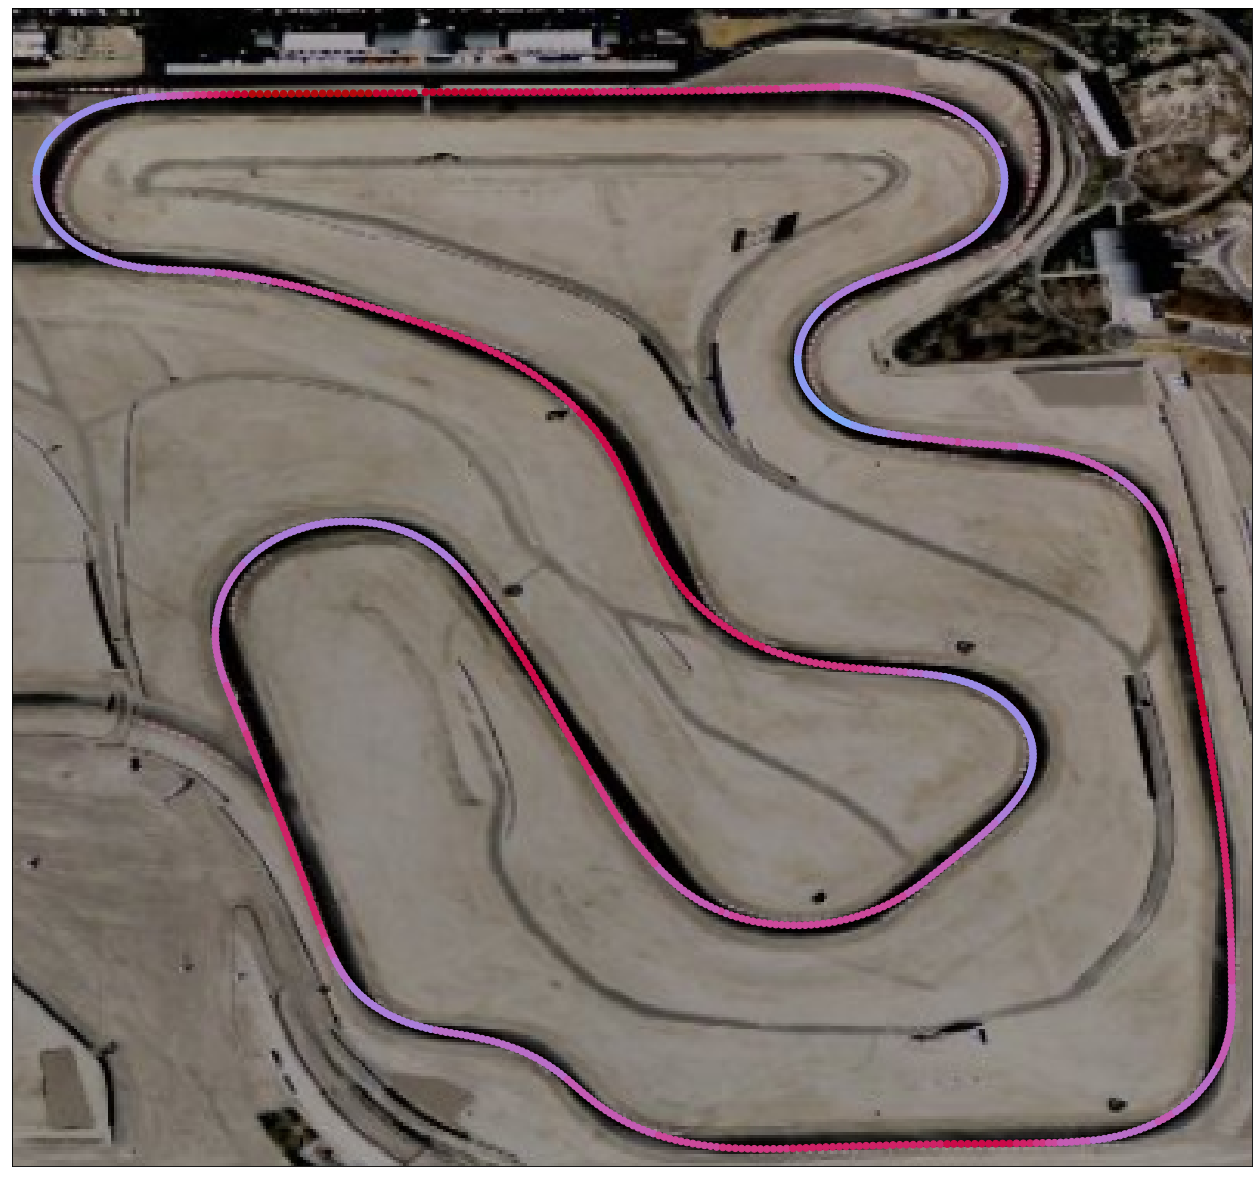

In [12]:
plt.figure(figsize=(20, 20), dpi=80)
#map = Basemap(llcrnrlon=x_bound_low,urcrnrlon=x_bound_high,llcrnrlat=y_bound_low,urcrnrlat=y_bound_high,resolution= 'c')
map = Basemap(llcrnrlon=lon_min,urcrnrlon=lon_max,llcrnrlat=lat_min,urcrnrlat=lat_max,resolution = 'c')
#resolution f=full, c=basic
#http://server.arcgisonline.com/arcgis/rest/services
#https://matplotlib.org/basemap/api/basemap_api.html
#map.figure(figsize=(20, 20), dpi=80)
map.arcgisimage(service='ESRI_Imagery_World_2D', verbose= True)
plt.scatter(one_lap['longitude'],one_lap['lattitude'], c=one_lap['speed_gradient'])
plt.show()

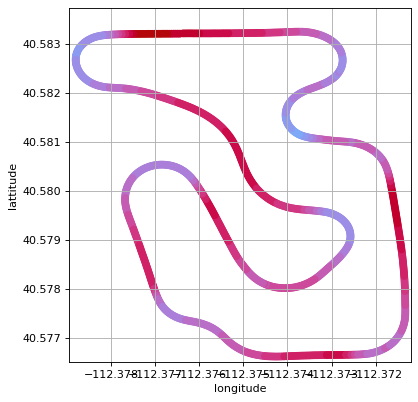

In [25]:
plt.figure(figsize=(5, 5), dpi=80)
plt.grid(which='both')
plt.tight_layout()
plt.xlim([lon_min,lon_max])
plt.ylim([lat_min,lat_max])
plt.ylabel('lattitude')
plt.xlabel('longitude')
plt.ticklabel_format(useOffset=False)
plt.scatter(one_lap['longitude'],one_lap['lattitude'], c=one_lap['speed_gradient']);